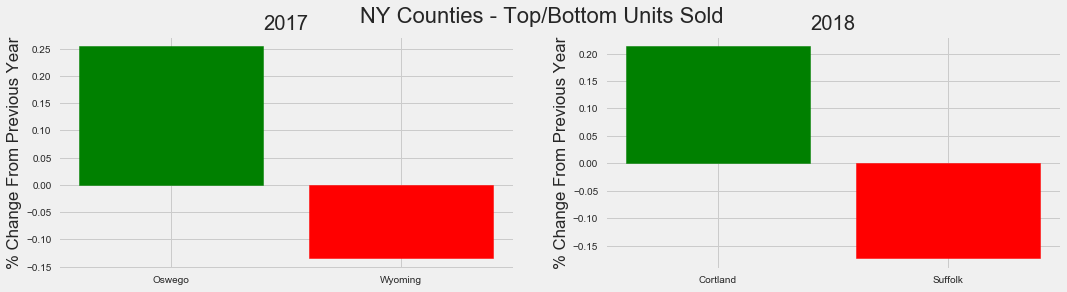

In [41]:
import pandas as P
from matplotlib import pyplot as PP
import seaborn as SEA

PP.style.use('fivethirtyeight')

csv_load = P.read_csv('https://raw.githubusercontent.com/letdata/provisional/master/ny_res_median_units_price_by_county_clean.csv')

g_data = csv_load
g_data['transactions'] = g_data['transactions'].str.replace(',', '').astype(int)
g_data['transactions_pc'] = g_data.sort_values(by=['county', 'year_']).groupby(['county']).transactions.pct_change(1)
g_data['median_'] = g_data['median_'].str.replace(',', '').astype(int)
g_data['median_pc'] = g_data.sort_values(by=['county', 'year_']).groupby(['county']).median_.pct_change()

g_data = g_data.loc[g_data['year_'] > 2016][['year_', 'county', 'transactions_pc']]

tmax_2017 = g_data.query("year_ == 2017").sort_values(by=['county', 'year_']).transactions_pc.max()
tmax_2018 = g_data.query("year_ == 2018").sort_values(by=['county', 'year_']).transactions_pc.max()
tmax2017 = g_data.loc[g_data['transactions_pc'] == tmax_2017]
tmax2018 = g_data.loc[g_data['transactions_pc'] == tmax_2018]

tmin_2017 = g_data.query("year_ == 2017").sort_values(by=['county', 'year_']).transactions_pc.min()
tmin_2018 = g_data.query("year_ == 2018").sort_values(by=['county', 'year_']).transactions_pc.min()
tmin2017 = g_data.loc[g_data['transactions_pc'] == tmin_2017]
tmin2018 = g_data.loc[g_data['transactions_pc'] == tmin_2018]

t2017 = P.concat([tmax2017, tmin2017])
t2018 = P.concat([tmax2018, tmin2018])

feg, axs = PP.subplots(nrows=1, ncols=2, figsize=PP.figaspect(1/4))

feg.suptitle('NY Counties - Top/Bottom Units Sold', fontsize=22)

PP.rc('xtick', labelsize=14)
PP.rc('ytick', labelsize=14)

ax = axs[0]
sp2017 = ax.bar(t2017['county'], t2017['transactions_pc'])
ax.set_title('2017')
ax.set_ylabel('% Change From Previous Year')

for bar, height in zip(sp2017, t2017['transactions_pc']):
    if height < 0:
        bar.set(color = 'red')
    else:
        bar.set(color = 'green')

ax = axs[1]
sp2018 = ax.bar(t2018['county'], t2018['transactions_pc'])
ax.set_title('2018')
ax.set_ylabel('% Change From Previous Year')

for bar, height in zip(sp2018, t2018['transactions_pc']):
    if height < 0:
        bar.set(color = 'red')
    else:
        bar.set(color = 'green')

PP.show()
